In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style='whitegrid')


In [6]:

data = pd.read_csv('./data/togo-dapaong_qc.csv')


display(data.describe())


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:

display(data.isna().sum())
display((data.isna().sum()/len(data) * 100)[lambda x: x > 5])


cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_scores = data[cols].apply(zscore, nan_policy='omit')
display((abs(z_scores) > 3).sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Comments    100.0
dtype: float64

GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

C:\Users\blien\AppData\Local\Temp\ipykernel_18428\3731883946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\blien\AppData\Local\Temp\ipykernel_18428\3731883946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

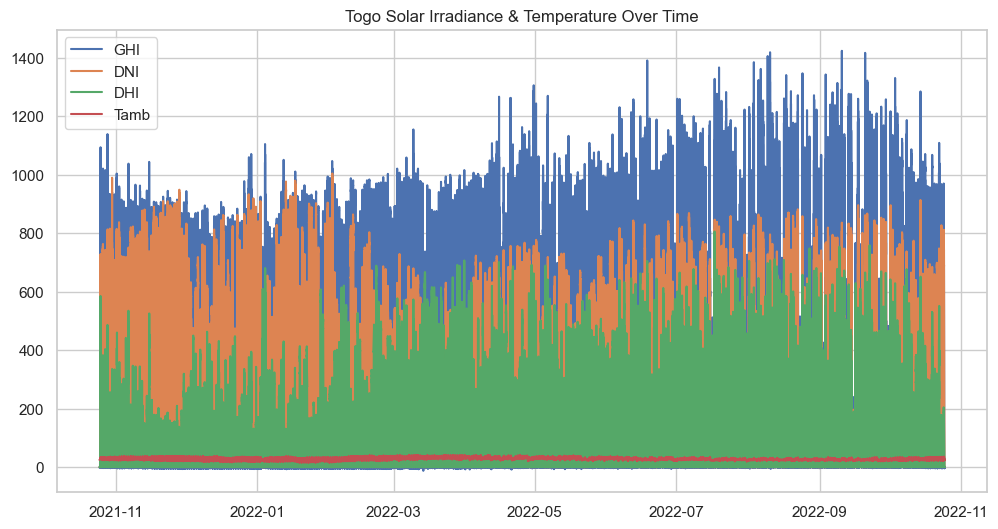

In [8]:
for col in cols:
    data[col].fillna(data[col].median(), inplace=True)


data['Timestamp'] = pd.to_datetime(data['Timestamp'])
plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'], data['GHI'], label='GHI')
plt.plot(data['Timestamp'], data['DNI'], label='DNI')
plt.plot(data['Timestamp'], data['DHI'], label='DHI')
plt.plot(data['Timestamp'], data['Tamb'], label='Tamb')
plt.title("Togo Solar Irradiance & Temperature Over Time")
plt.legend()
plt.show()


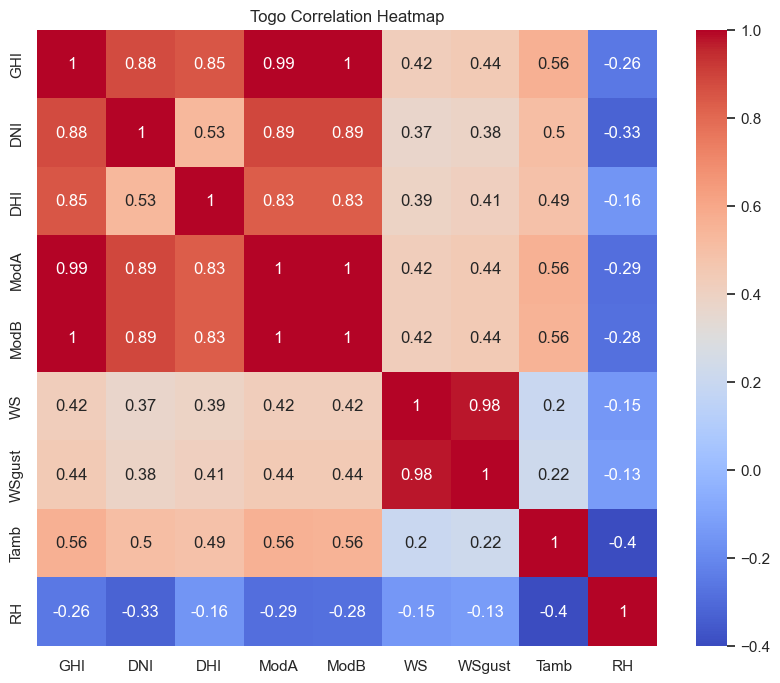

In [9]:

if 'CleaningFlag' in data.columns:
    data.groupby('CleaningFlag')[['ModA','ModB']].mean().plot(kind='bar')
    plt.title("Average ModA & ModB by CleaningFlag")
    plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(data[cols + ['Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Togo Correlation Heatmap")
plt.show()

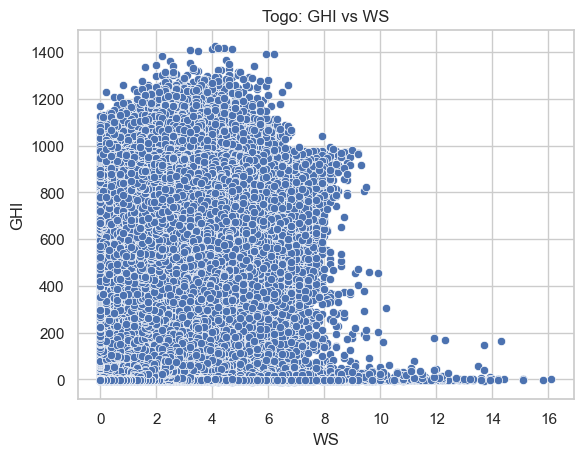

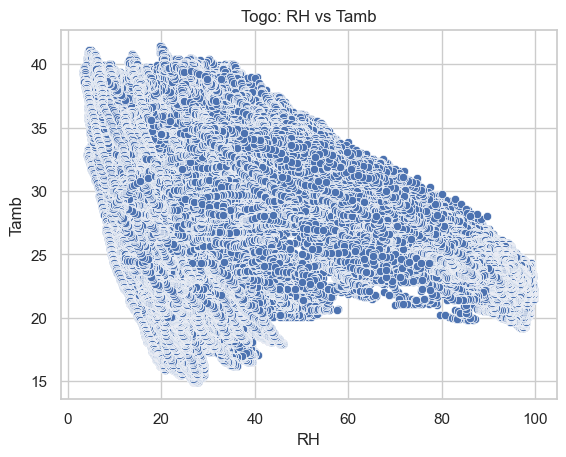

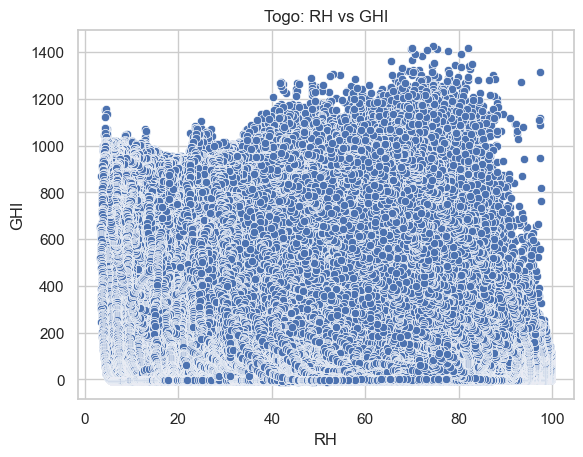

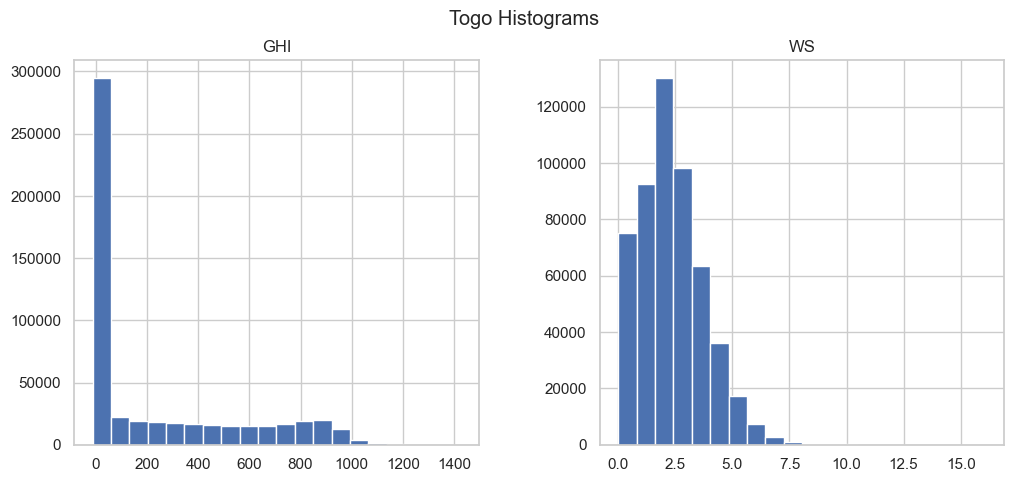

In [10]:

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=data)
plt.title("Togo: GHI vs WS")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title("Togo: RH vs Tamb")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=data)
plt.title("Togo: RH vs GHI")
plt.show()

# Histograms
data[['GHI','WS']].hist(figsize=(12,5), bins=20)
plt.suptitle("Togo Histograms")
plt.show()

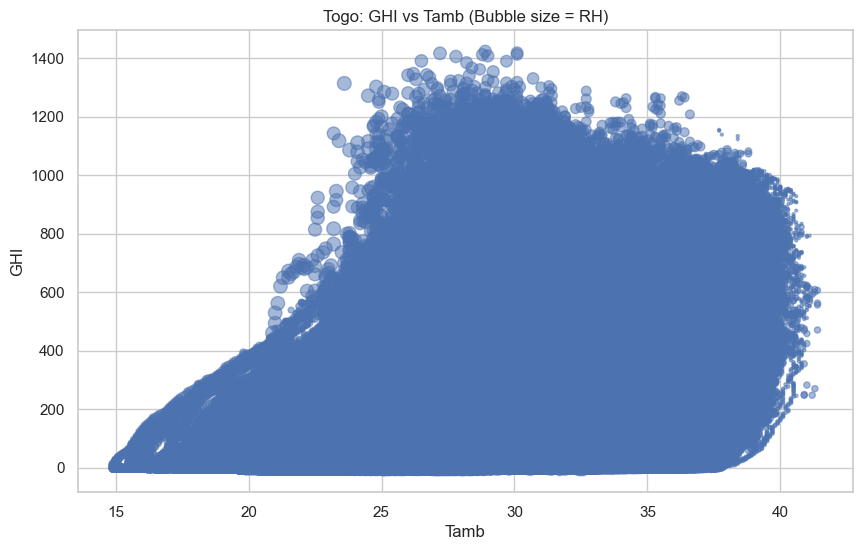

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(data['Tamb'], data['GHI'], s=data['RH'], alpha=0.5)
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title("Togo: GHI vs Tamb (Bubble size = RH)")
plt.show()